<a href="https://colab.research.google.com/github/Rochit02/ML-lab/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
from sklearn.impute import SimpleImputer

In [20]:
def load_and_preprocess_data(filepath):
    """Load and preprocess the HDD dataset"""
    df = pd.read_csv(filepath)

    # Select relevant features and target
    features = ['capacity_bytes', 'is_legacy_format', 'smart_1_normalized', 'smart_1_raw']
    target = 'failure'

    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(df[features])
    y = df[target].values

    print("Dataset loaded and preprocessed successfully!")
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")
    print("\nSample of features:")
    print(pd.DataFrame(X, columns=features).head())

    return X, y, features

FILEPATH = 'hdd_dataset.csv'
X, y, features = load_and_preprocess_data(FILEPATH)

Dataset loaded and preprocessed successfully!
Shape of X: (304957, 4)
Shape of y: (304957,)

Sample of features:
   capacity_bytes  is_legacy_format  smart_1_normalized  smart_1_raw
0    2.500594e+11               0.0               100.0          0.0
1    2.500594e+11               0.0               100.0          0.0
2    8.001563e+12               0.0               100.0          0.0
3    8.001563e+12               0.0               100.0          0.0
4    8.001563e+12               0.0               100.0          0.0


In [21]:
def analyze_class_statistics(X, y):
    """Calculate and display class statistics"""
    class_labels = np.unique(y)
    class_means = [np.mean(X[y == label], axis=0) for label in class_labels]
    class_stds = [np.std(X[y == label], axis=0) for label in class_labels]
    distance = np.linalg.norm(class_means[0] - class_means[1])

    print("## A1: Intraclass Spread and Interclass Distances")
    for i, label in enumerate(class_labels):
        print(f"\nClass {label} Statistics:")
        print(f"Mean: {class_means[i]}")
        print(f"Standard Deviation: {class_stds[i]}")
    print(f"\nDistance between class means: {distance:.4f}")

    return class_means, class_stds, distance

class_means, class_stds, mean_distance = analyze_class_statistics(X, y)

## A1: Intraclass Spread and Interclass Distances

Class 0 Statistics:
Mean: [1.44905565e+13 0.00000000e+00 9.30899062e+01 4.24453657e+07]
Standard Deviation: [4.03430392e+12 0.00000000e+00 1.01010942e+01 7.19215402e+07]

Class 1 Statistics:
Mean: [1.13337094e+13 0.00000000e+00 7.96666667e+01 7.31949747e+07]
Standard Deviation: [1.49018107e+12 0.00000000e+00 2.10290804e+01 7.75890164e+07]

Distance between class means: 3156847139339.4980


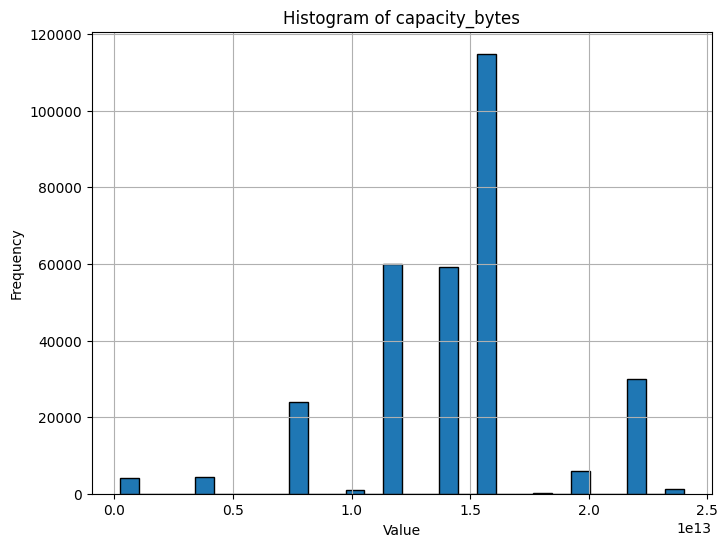

Analysis for feature: 'capacity_bytes'
Mean: 14490494419711.5508
Variance: 16275527625534523354120192.0000


In [22]:
def analyze_feature(X, features, feature_index=0):
    """Analyze and plot histogram for a specific feature"""
    feature_name = features[feature_index]
    feature_values = X[:, feature_index]

    plt.figure(figsize=(8, 6))
    plt.hist(feature_values, bins=30, edgecolor='black')
    plt.title(f'Histogram of {feature_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    mean_val = np.mean(feature_values)
    var_val = np.var(feature_values)

    print(f"Analysis for feature: '{feature_name}'")
    print(f"Mean: {mean_val:.4f}")
    print(f"Variance: {var_val:.4f}")

    return mean_val, var_val

feature_mean, feature_var = analyze_feature(X, features)

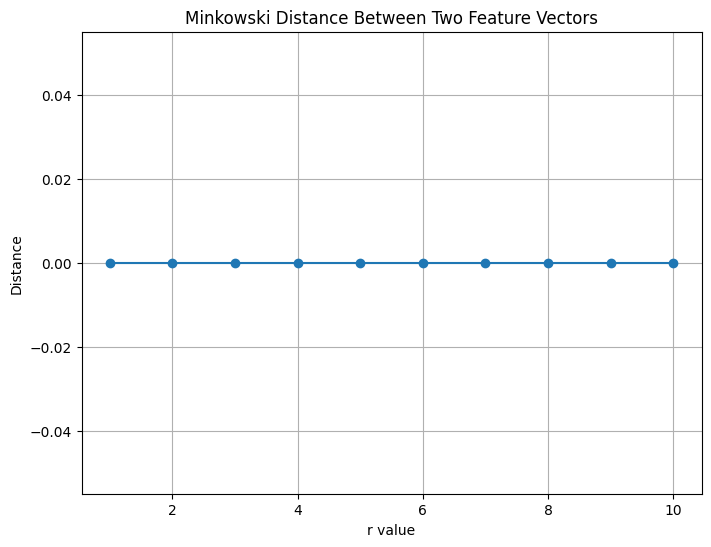

Minkowski distances:
r=1: 0.0000
r=2: 0.0000
r=3: 0.0000
r=4: 0.0000
r=5: 0.0000
r=6: 0.0000
r=7: 0.0000
r=8: 0.0000
r=9: 0.0000
r=10: 0.0000


In [23]:
def calculate_minkowski_distances(vec1, vec2, r_range):
    """Calculate and plot Minkowski distances for different r values"""
    distances = [np.linalg.norm(vec1 - vec2, ord=r) for r in r_range]

    plt.figure(figsize=(8, 6))
    plt.plot(r_range, distances, marker='o')
    plt.title('Minkowski Distance Between Two Feature Vectors')
    plt.xlabel('r value')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()

    print("Minkowski distances:")
    for r, dist in zip(r_range, distances):
        print(f"r={r}: {dist:.4f}")

    return distances

vec_a, vec_b = X[0], X[1]
r_values = range(1, 11)
minkowski_dists = calculate_minkowski_distances(vec_a, vec_b, r_values)

In [28]:
def split_data(X, y, test_size=0.3, random_state=42):
    """Split data into training and test sets"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y)

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")
    print("\nClass distribution in y_train:")
    print(pd.Series(y_train).value_counts(normalize=True))
    print("\nClass distribution in y_test:")
    print(pd.Series(y_test).value_counts(normalize=True))

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

Training set size: 213469 samples
Test set size: 91488 samples

Class distribution in y_train:
0    0.999981
1    0.000019
Name: proportion, dtype: float64

Class distribution in y_test:
0    0.999978
1    0.000022
Name: proportion, dtype: float64


In [29]:
def train_and_evaluate_knn(X_train, y_train, X_test, y_test, k=3):
    """Train and evaluate kNN classifier"""
    # Train classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluate accuracy
    accuracy = knn.score(X_test, y_test)
    print(f"kNN Classifier (k={k})")
    print(f"Test accuracy: {accuracy:.4f}")

    # Make prediction on first test sample
    sample = X_test[0].reshape(1, -1)
    prediction = knn.predict(sample)
    print("Sample Prediction")
    print(f"Predicted: {'Failure' if prediction[0] else 'Normal'}")
    print(f"Actual: {'Failure' if y_test[0] else 'Normal'}")

    return knn, accuracy

knn_model, test_accuracy = train_and_evaluate_knn(X_train, y_train, X_test, y_test)

kNN Classifier (k=3)
Test accuracy: 1.0000

## Sample Prediction
Predicted: Normal
Actual: Normal


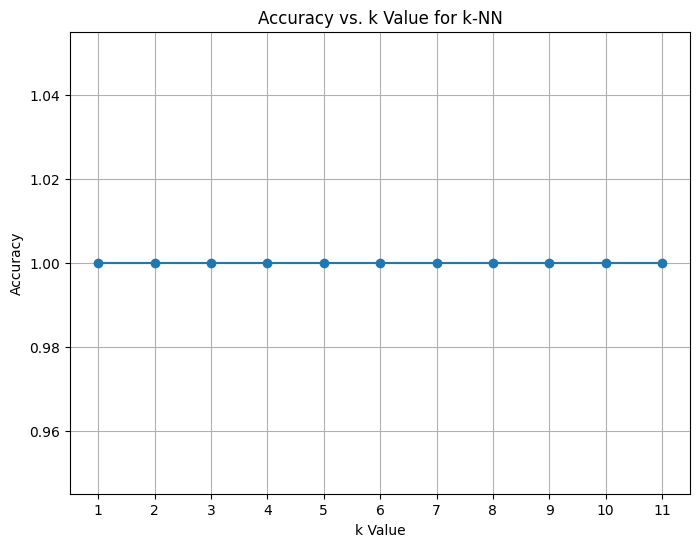

Accuracy for different k values:
k=1: 1.0000
k=2: 1.0000
k=3: 1.0000
k=4: 1.0000
k=5: 1.0000
k=6: 1.0000
k=7: 1.0000
k=8: 1.0000
k=9: 1.0000
k=10: 1.0000
k=11: 1.0000


In [26]:
def compare_k_values(X_train, y_train, X_test, y_test, k_range=range(1, 12)):
    """Compare accuracy for different k values"""
    accuracies = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        accuracies.append(knn.score(X_test, y_test))

    plt.figure(figsize=(8, 6))
    plt.plot(k_range, accuracies, marker='o')
    plt.title('Accuracy vs. k Value for k-NN')
    plt.xlabel('k Value')
    plt.ylabel('Accuracy')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    print("Accuracy for different k values:")
    for k, acc in zip(k_range, accuracies):
        print(f"k={k}: {acc:.4f}")

    return accuracies

k_values = range(1, 12)
accuracies = compare_k_values(X_train, y_train, X_test, y_test, k_values)

In [30]:
def evaluate_performance(model, X_train, y_train, X_test, y_test):
    """Evaluate model performance metrics"""
    def get_metrics(X, y):
        y_pred = model.predict(X)
        return {
            'accuracy': accuracy_score(y, y_pred),
            'precision': precision_score(y, y_pred),
            'recall': recall_score(y, y_pred),
            'f1': f1_score(y, y_pred),
            'confusion_matrix': confusion_matrix(y, y_pred)
        }

    train_metrics = get_metrics(X_train, y_train)
    test_metrics = get_metrics(X_test, y_test)

    print("--- Training Set ---")
    print(f"Accuracy: {train_metrics['accuracy']:.4f}")
    print(f"Precision: {train_metrics['precision']:.4f}")
    print(f"Recall: {train_metrics['recall']:.4f}")
    print(f"F1-Score: {train_metrics['f1']:.4f}")
    print(f"Confusion Matrix:\n{train_metrics['confusion_matrix']}")

    print("--- Test Set ---")
    print(f"Accuracy: {test_metrics['accuracy']:.4f}")
    print(f"Precision: {test_metrics['precision']:.4f}")
    print(f"Recall: {test_metrics['recall']:.4f}")
    print(f"F1-Score: {test_metrics['f1']:.4f}")
    print(f"Confusion Matrix:\n{test_metrics['confusion_matrix']}")

    # Model fit analysis
    print("--- Model Fit Analysis ---")
    if train_metrics['accuracy'] > test_metrics['accuracy'] + 0.1:
        print("The model is OVERFITTING (high train accuracy, lower test accuracy)")
    elif train_metrics['accuracy'] < 0.7:
        print("The model may be UNDERFITTING (low performance on both sets)")
    else:
        print("The model has a REGULAR FIT (good balance between train and test performance)")

evaluate_performance(knn_model, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Training Set ---
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Confusion Matrix:
[[213465      0]
 [     4      0]]
--- Test Set ---
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Confusion Matrix:
[[91486     0]
 [    2     0]]
--- Model Fit Analysis ---
The model has a REGULAR FIT (good balance between train and test performance)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
